# Access a subset of DISP-S1 data remotely

In this demo, we download a small subset of DISP-S1 displacement data, re-reference it spatially, and adjust for the moving reference date to get a continuous time series.

In [2]:
!python ../scripts/fetch_disp.py --help

usage: fetch_disp.py [-h] [OPTIONS]

Read displacement data from a single product.

╭─ options ──────────────────────────────────────────────────────────────────╮
│ -h, --help              show this help message and exit                    │
│ --frame-id INT          Frame ID of the product (required)                 │
│ --lon {None}|FLOAT      Longitude of the reference point (default: None)   │
│ --lat {None}|FLOAT      Latitude of the reference point (default: None)    │
│ --bbox {None}|{FLOAT FLOAT FLOAT FLOAT}                                    │
│                         Bounding box of the region of interest (default:   │
│                         None)                                              │
│ --wkt {None}|STR        Well-known text representation of the region of    │
│                         interest (default: None)                           │
│ --reference-method {none,point,median,border}                              │
│                         Method to use for spa

In [ ]:
%%time

!../scripts/fetch_disp.py --frame-id 20697  \
    --end-datetime 2020-01-01 \
    --bbox -103.148 31.768 -103.11 31.796 \
    --reference-method border


Found 88 products for Frame 20697
Reading products: 100%|█████████████████████████| 88/88 [00:59<00:00,  1.48it/s]
CPU times: user 1.19 s, sys: 609 ms, total: 1.79 s
Wall time: 1min 15s


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [7]:
ds = xr.open_dataset("F20697_displacement.nc")
ds

<xarray.Dataset> Size: 4MB
Dimensions:       (y: 102, x: 122, time: 88)
Coordinates:
  * y             (y) float64 816B 3.519e+06 3.519e+06 ... 3.516e+06 3.516e+06
  * x             (x) float64 976B 6.753e+05 6.754e+05 ... 6.789e+05 6.79e+05
  * time          (time) datetime64[ns] 704B 2016-08-01T00:51:33 ... 2019-12-...
Data variables:
    spatial_ref   int64 8B ...
    displacement  (time, y, x) float32 4MB ...

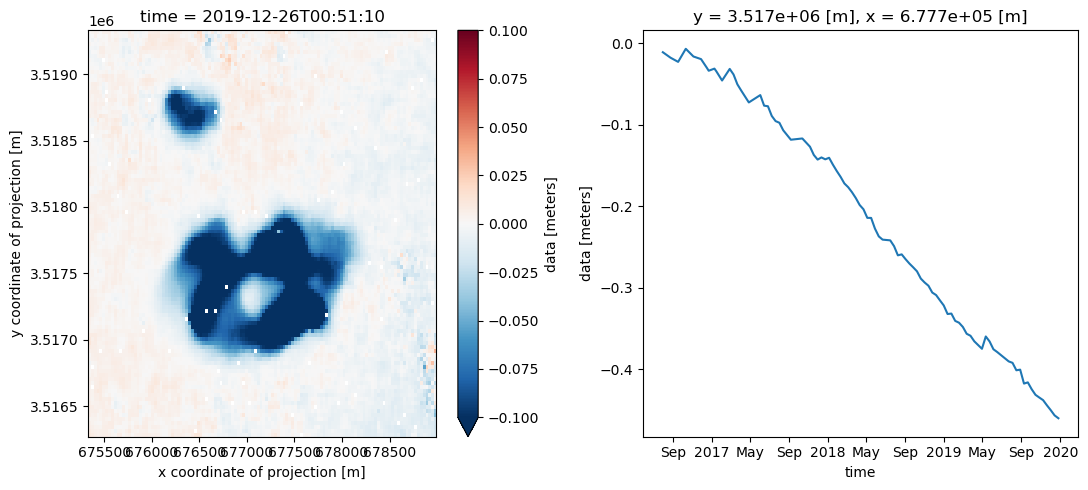

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(11, 5))

ds.displacement[-1].plot.imshow(vmax=.1, vmin=-.1, cmap='RdBu_r', ax=axes[0])
row, col = np.unravel_index(ds.displacement[-1].argmin(), ds.displacement.shape[-2:])
ds.displacement.isel(y=row, x=col).plot(ax=axes[1])
fig.tight_layout()